In [42]:
import pandas as pd

In [43]:
import seaborn as sns
import numpy as np


In [44]:
data=pd.read_csv("/Users/vilmaxavier/Desktop/ScoutingApp/playerperformance/player_rankings_2024.csv")

In [45]:
data.head()


,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,Virat Kohli,Royal Challengers Bangalore,374,1.245,0.223,"$2,656,250","$1,576,696"
1,2,Ruturaj Gaikwad,Chennai Super Kings,296,0.985,0.172,"$28,600","$1,345,725"
2,3,Jasprit Bumrah,Mumbai Indians,271,0.900,0.188,"$1,093,750","$1,270,215"
3,4,Sunil Narine,Kolkata Knight Riders,269,0.894,0.225,"$1,953,130","$1,264,885"
4,5,Sanju Samson,Rajasthan Royals,252,0.837,0.149,"$1,250,000","$1,214,248"


In [46]:
data.shape

(202, 8)

In [6]:
data.describe

<bound method NDFrame.describe of      Rank               Player                         Team  RAA   Wins  \
0       1          Virat Kohli  Royal Challengers Bangalore  374  1.245   
1       2      Ruturaj Gaikwad          Chennai Super Kings  296  0.985   
2       3       Jasprit Bumrah               Mumbai Indians  271  0.900   
3       4         Sunil Narine        Kolkata Knight Riders  269  0.894   
4       5         Sanju Samson             Rajasthan Royals  252  0.837   
..    ...                  ...                          ...  ...    ...   
197   198        Hardik Pandya               Mumbai Indians -145 -0.482   
198   199        Jitesh Sharma                 Punjab Kings -154 -0.512   
199   200       Shardul Thakur          Chennai Super Kings -164 -0.544   
200   201         Ravi Bishnoi         Lucknow Super Giants -167 -0.554   
201   202  Ravichandran Ashwin             Rajasthan Royals -204 -0.678   

     EFscore      Salary       Value  
0      0.223  $2,656,250  

In [47]:
data.describe()

,Rank,RAA,Wins,EFscore
count,202.000000,202.000000,202.000000,202.000000
mean,101.500000,0.029703,0.000000,0.052282
std,58.456537,94.798971,0.315181,0.047220
min,1.000000,-204.000000,-0.678000,0.000000
25%,51.250000,-57.000000,-0.190750,0.011000
50%,101.500000,-23.000000,-0.077500,0.039000
75%,151.750000,30.500000,0.102000,0.080000
max,202.000000,374.000000,1.245000,0.225000


In [33]:
data.isnull().sum()

Rank        0
Player      0
Team       15
RAA         0
Wins        0
EFscore     0
Salary     85
Value       0
dtype: int64

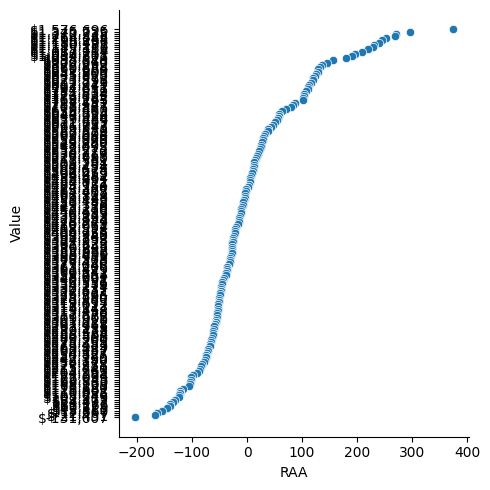

In [48]:
sns.relplot(x='RAA' , y='Value' , data=data)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
pip install scikit-learn

  Using cached scikit_learn-1.5.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp312-cp312-macosx_12_0_arm64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 13.7 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [50]:
data.head()


,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,Virat Kohli,Royal Challengers Bangalore,374,1.245,0.223,"$2,656,250","$1,576,696"
1,2,Ruturaj Gaikwad,Chennai Super Kings,296,0.985,0.172,"$28,600","$1,345,725"
2,3,Jasprit Bumrah,Mumbai Indians,271,0.900,0.188,"$1,093,750","$1,270,215"
3,4,Sunil Narine,Kolkata Knight Riders,269,0.894,0.225,"$1,953,130","$1,264,885"
4,5,Sanju Samson,Rajasthan Royals,252,0.837,0.149,"$1,250,000","$1,214,248"


In [51]:
# Remove the dollar sign and convert the Value column to integers
data['Value'] = data['Value'].str.replace('$', '', regex=False)
data['Value'] = data['Value'].str.replace(',', '', regex=False)
data['Value'] = data['Value'].astype(int)
data.head()


,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,Virat Kohli,Royal Challengers Bangalore,374,1.245,0.223,"$2,656,250",1576696
1,2,Ruturaj Gaikwad,Chennai Super Kings,296,0.985,0.172,"$28,600",1345725
2,3,Jasprit Bumrah,Mumbai Indians,271,0.900,0.188,"$1,093,750",1270215
3,4,Sunil Narine,Kolkata Knight Riders,269,0.894,0.225,"$1,953,130",1264885
4,5,Sanju Samson,Rajasthan Royals,252,0.837,0.149,"$1,250,000",1214248


In [66]:
X =data.drop(['Rank','Player','Team','Salary','Value'], axis=1)
y =data['Value']

In [67]:
X

,RAA,Wins,EFscore
0,374,1.245,0.223
1,296,0.985,0.172
2,271,0.900,0.188
3,269,0.894,0.225
4,252,0.837,0.149
...,...,...,...
197,-145,-0.482,0.105
198,-154,-0.512,0.020
199,-164,-0.544,0.030
200,-167,-0.554,0.043


In [68]:
X_train, X_test , y_train , y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [69]:
regr=LinearRegression()

In [70]:
regr.fit(X_train,y_train)

LinearRegression()

In [71]:
pred=regr.predict(X_test)

In [72]:
pred

array([ 549760.28861208,  309904.84931881,  998378.54264536,
        408512.09634976,  821596.24601792,  442269.52171619,
        774513.60355022, 1087213.83900401,  204190.89040509,
        533769.89162406,  254826.99900333,  504454.19123656,
        506230.93012267,  330337.08909137, 1180490.98915147,
        611056.64200327, 1034801.04451483,  173098.56696789,
        340997.30648893,  215739.45410745,  548871.90865706,
       1270214.61820401,  502677.52602236, 1264884.55479714,
        802940.87116113,  166880.095226  ,  236171.56310092,
        707887.15704037,  932640.50348592,  336555.46648461,
        334778.84754693,  391633.38456436,  596842.9182799 ,
        388079.98932551,  461813.26766655,  250385.33999305,
       1117417.87700844,  361429.36625206,  582629.29776663,
        227288.0906707 ,  327671.91233204,  319676.84626764,
        247720.16717215,  631488.6871709 ,  363206.0363893 ,
        323230.19129154,  269929.07609734,  181093.71377004,
        404958.63908069,

In [73]:
regr.score(X_test,y_test)

0.9999999999991799

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


Mean Absolute Error (MAE): 0.2311075806510864
Mean Squared Error (MSE): 0.07781031612251317
Root Mean Squared Error (RMSE): 0.2789450055521933
R² score: 0.9999999999991799


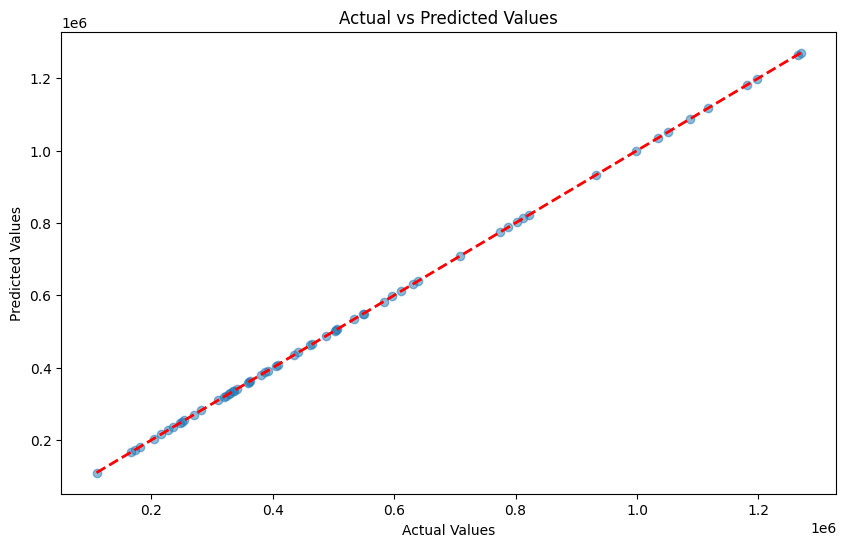

In [60]:

# Evaluate model performance
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² score:", regr.score(X_test, y_test))

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [61]:
data.head()

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,Virat Kohli,Royal Challengers Bangalore,374,1.245,0.223,"$2,656,250",1576696
1,2,Ruturaj Gaikwad,Chennai Super Kings,296,0.985,0.172,"$28,600",1345725
2,3,Jasprit Bumrah,Mumbai Indians,271,0.900,0.188,"$1,093,750",1270215
3,4,Sunil Narine,Kolkata Knight Riders,269,0.894,0.225,"$1,953,130",1264885
4,5,Sanju Samson,Rajasthan Royals,252,0.837,0.149,"$1,250,000",1214248


In [62]:
data.tail()

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
197,198,Hardik Pandya,Mumbai Indians,-145,-0.482,0.105,"$1,718,750",42511
198,199,Jitesh Sharma,Punjab Kings,-154,-0.512,0.020,NaN,15860
199,200,Shardul Thakur,Chennai Super Kings,-164,-0.544,0.030,"$406,250",-12567
200,201,Ravi Bishnoi,Lucknow Super Giants,-167,-0.554,0.043,"$285,700",-21451
201,202,Ravichandran Ashwin,Rajasthan Royals,-204,-0.678,0.067,"$1,100,000",-131607


In [63]:
new_data = pd.DataFrame({
    'RAA': [269,296,-145],       
    'Wins': [0.894,0.985,-0.482],     
    'EFscore': [0.225,0.172,0.105]    
})

In [64]:


new_predictions = regr.predict(new_data)
print("Predictions for new data:", new_predictions)


Predictions for new data: [1264884.55479714 1345724.65807711   42510.74767099]


In [75]:
X_test

,RAA,Wins,EFscore
53,27,0.089,0.118
149,-54,-0.181,0.001
13,179,0.594,0.127
98,-21,-0.070,0.032
23,119,0.395,0.059
...,...,...,...
126,-38,-0.126,0.030
11,196,0.653,0.105
189,-122,-0.406,0.019
24,116,0.385,0.118


In [76]:
y_test

53      549760
149     309905
13      998379
98      408512
23      821596
        ...   
126     358764
11     1050791
189     110025
24      812713
92      435163
Name: Value, Length: 61, dtype: int64

In [85]:
new_data = pd.DataFrame({
    'RAA': [0,0,0],       
    'Wins': [0.00,0.00,0.00],     
    'EFscore': [0.00,0.00,0.00]    
})

In [86]:
new_predictions = regr.predict(new_data)
print("Predictions for new data:", new_predictions)


Predictions for new data: [470696.77849642 470696.77849642 470696.77849642]
